# Model Evaluation Metrics:
## 1-Accuracy
## 2-Area Under Curve ROC
## 3-Confusion Matrix
## 4-Classification Report

# Accurracy

### HENCE ACCURACY IS SIMPLE AND WE CAN GET THAT BY CALLING THE SCORE METHOD, OR CROSS-SCORE-VAL METHOD

# Area under curve ROC

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## iris-dataset is a multi-class classfication problem

In [24]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()

In [26]:
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'] )
iris_df['target']= pd.Series(iris['target'])
iris_df.head(-15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,2


In [27]:
X = iris_df.drop('target',axis = 1)
Y = iris_df['target']

In [28]:
x_train,x_test, y_train , y_test = train_test_split(X,Y, test_size = 0.2)

In [29]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train);

In [30]:
rfc.predict_proba(x_test)[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## The ROC(Area under curve) is a bit complex for the iris dataset as this is a Multi-class classification problem will be done later

# EVAL - METRICS
# 2- Area Under Curve (ROC) for a Binary Classification Problem
## Heart Dataset(heart disease prediction)

In [7]:
# import the heart-disease datasets, b/c it is a classification problem
heart_ds = pd.read_csv('./../heart.csv')

In [8]:
x = heart_ds.drop("target",axis=1)
y = heart_ds["target"]

# split the data into train and  test 
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x,y,test_size = 0.3)

In [9]:
RFC_model = RandomForestClassifier()

In [10]:
RFC_model.fit(X_TRAIN,Y_TRAIN)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# first column shows the probability of 0, and second column for 1 respectively
predicted_y_labels=RFC_model.predict_proba(X_TEST) # first five predicted scores

In [14]:
predicted_y_labels[:5] # For simplicity we show the first 5 elements

array([[0.3 , 0.7 ],
       [0.92, 0.08],
       [0.34, 0.66],
       [0.48, 0.52],
       [0.58, 0.42]])

### step-1: Get the positive(1) Y labels probability scores

In [15]:
# take only the probability of positive labels
positive_Y_prob = predicted_y_labels[:,1]

### step-2 Call the roc_curve() method with appropriate parameters

In [16]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_TEST,positive_Y_prob) # returns the fpr, tpr and threshold

In [17]:
# as you can see that this output does not give musch more sense so we are going to draw it in a graph
print("False Positive Rate\n",fpr,"\nTrue Positive Rate\n",tpr,"\n Threshold\n",threshold)

False Positive Rate
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02564103
 0.02564103 0.05128205 0.05128205 0.05128205 0.07692308 0.07692308
 0.15384615 0.20512821 0.20512821 0.23076923 0.23076923 0.25641026
 0.25641026 0.28205128 0.28205128 0.30769231 0.30769231 0.33333333
 0.41025641 0.41025641 0.41025641 0.43589744 0.51282051 0.56410256
 0.61538462 0.69230769 0.84615385 1.        ] 
True Positive Rate
 [0.         0.03846154 0.07692308 0.09615385 0.17307692 0.23076923
 0.26923077 0.28846154 0.36538462 0.44230769 0.48076923 0.51923077
 0.53846154 0.53846154 0.61538462 0.65384615 0.65384615 0.67307692
 0.67307692 0.67307692 0.71153846 0.75       0.76923077 0.76923077
 0.78846154 0.78846154 0.80769231 0.80769231 0.84615385 0.84615385
 0.88461538 0.92307692 0.94230769 0.96153846 0.96153846 1.
 1.         1.         1.         1.        ] 
 Threshold
 [ inf 1.   0.98 0.97 0.96 0.92 0.91 0.9  0.85 0.79 0.74 0.7  0.68

## step-3: Draw the Plot for fpr vs tpr

In [18]:
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr):
    plt.plot(fpr,tpr, color = "red", label = "AUC")

    # customizations:
    plt.title("Area under ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

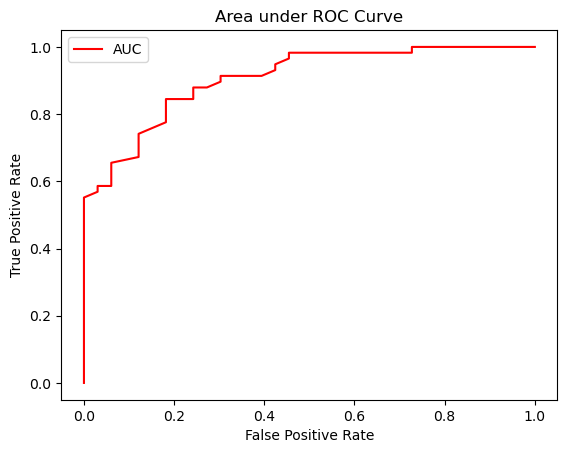

In [73]:
plot_roc(fpr,tpr)

## step-4 roc_auc_score
### As the roc curve alone does not have any meaning until U don't find the score

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_TEST,positive_Y_prob)

0.9064785788923719

# EVAL - METRICS
# 3- CONFUSION METRIx

In [20]:
from sklearn.metrics import confusion_matrix
y_predicted = RFC_model.predict(X_TEST)
# now call the confusion matrix with actual and predicted y labels
confusion_matrix(Y_TEST,y_predicted)

array([[30,  9],
       [13, 39]])

In [21]:
# visualizing
pd.crosstab(Y_TEST,
           y_predicted,
           rownames=["truth"],
           colnames=["predicted"])

predicted,0,1
truth,,
0,30,9
1,13,39


### ploting confusion matrix

### using seaborn, First Install the seaborn library
### we will install it here

In [22]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Jupyter detected...
3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: c:\ml1\venv

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.4  |       haa95532_0         128 KB
    certifi-2025.11.12         |  py313haa95532_0         154 KB
    openssl-3.0.18             |       h543e019_0         6.8 MB
    seaborn-0.13.2             |  py313haa95532_3         725 KB
    ------------------------------------------------------------
                                           Total:         7.8 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.13.2-py313haa95532_3 

The following packages will be UPDATED:

  ca-certificates                      2025.7.15-haa95532_0 



==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [26]:
import seaborn as sns

conf_mat = confusion_matrix(Y_TEST,y_predicted)

def plot_conf_matrix(conf_mat):
    fig , ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    plt.xlabel("Truth")
    plt.ylabel("Predicted")



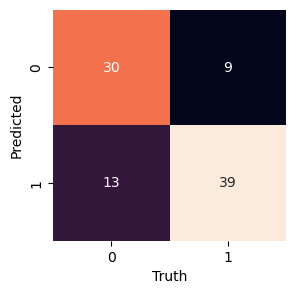

In [27]:
plot_conf_matrix(conf_mat)

# Evaluation Metrics
## 4-classification Report
### Collection of multiple metrics
#### -1 Recall
#### -2 Precision
#### -3 Imbalance
#### -4 F1